In [ ]:
import sys
from ast import literal_eval

from utils.gamehelper import PoeBot


In [2]:
notebook_dev = False
# readability
poe_bot: PoeBot

In [ ]:
default_config = {
  "REMOTE_IP": "172.23.178.57",  # z2
  "unique_id": "poe_2_test",
  "build": "EaBallistasEle",
  "password": None,
  "max_lvl": 101,
  "chromatics_recipe": True,
  "force_reset_temp": False,
}


try:
  i = sys.argv[1]
  print(i)
  parsed_config = literal_eval(i)
  print("successfully parsed cli config")
  print(f"parsed_config: {parsed_config}")
except:
  print("cannot parse config from cli, using default\dev one")
  notebook_dev = True
  parsed_config = default_config
  parsed_config["unique_id"] = PoeBot.getDevKey()

config = {}

for key in default_config.keys():
  config[key] = parsed_config.get(key, default_config[key])

print(f"config to run {config}")

In [ ]:
REMOTE_IP = config["REMOTE_IP"]  # REMOTE_IP
UNIQUE_ID = config["unique_id"]  # unique id
MAX_LVL = config.get("max_lvl")
CHROMATICS_RECIPE = config["chromatics_recipe"]
BUILD_NAME = config["build"]  # build_name
password = config["password"]
force_reset_temp = config["force_reset_temp"]
print(
  f"running aqueduct using: REMOTE_IP: {REMOTE_IP} unique_id: {UNIQUE_ID} max_lvl: {MAX_LVL} chromatics_recipe: {CHROMATICS_RECIPE} force_reset_temp: {force_reset_temp}"
)

In [ ]:
poe_bot = PoeBot(unique_id=UNIQUE_ID, remote_ip=REMOTE_IP, password=password)
poe_bot.check_resolution = False


In [ ]:
poe_bot.refreshAll()

In [ ]:
mixed_min_threshold_percent = 0.30  # 30%
mixed_min_threshold_flat = 200

In [ ]:
while True:
  call_esc = False
  poe_bot.refreshInstanceData()
  current_value_flat = poe_bot.game_data.player.life.energy_shield.current + poe_bot.game_data.player.life.health.current
  current_value_percent = current_value_flat / (poe_bot.game_data.player.life.energy_shield.total + poe_bot.game_data.player.life.health.total)
  print(f"current_value_flat {current_value_flat}, current_value_percent {current_value_percent}")
  if current_value_flat < mixed_min_threshold_flat:
    call_esc = True
  if current_value_percent < mixed_min_threshold_percent:
    call_esc = True
  if call_esc:
    poe_bot.bot_controls.keyboard.tap("DIK_ESCAPE")
    break

In [ ]:
raise 404

In [57]:
poe_bot.refreshAll()

[poebot] #refreshAll call at 1734259239.0967312


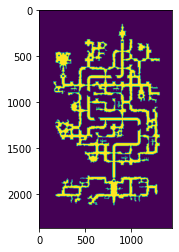

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(poe_bot.game_data.terrain.passable)